In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# 設定在 Notebook 中直接顯示圖表
%matplotlib inline

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [3]:
def load_report(filepath):
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            return json.load(f)
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return []

def analyze_report(data, name):
    severity_counts = {0: 0, 1: 0, 2: 0, 3: 0, -1: 0}
    
    for item in data:
        sev = item.get("severity_stage", -1)
        if sev not in severity_counts:
            sev = -1
        severity_counts[sev] += 1
        
    total = len(data)
    print(f"\nAnalysis for {name}:")
    print(f"Total Cases: {total}")
    for sev in sorted(severity_counts.keys()):
        count = severity_counts[sev]
        percentage = (count / total * 100) if total > 0 else 0
        print(f"  Severity {sev}: {count} ({percentage:.1f}%)")
        
    return severity_counts, total

def get_unique_causes(data):
    return set([item.get("root_cause_summary", "") for item in data])

In [4]:
# 定義輸入路徑 (請根據實際環境調整路徑)
base_dir = Path(r"C:\Users\bmwlab\Desktop\Testing_Row_Data")
op1_path = base_dir / "option_1/merge_only_error_class/option_1_classification_report.json"
op2_path = base_dir / "option_2/merge_only_error_class/option_2_classification_report.json"

output_dir = base_dir / "experment/result"
output_dir.mkdir(parents=True, exist_ok=True)

# 執行載入與初步分析
data1 = load_report(op1_path)
data2 = load_report(op2_path)

if data1 and data2:
    counts1, total1 = analyze_report(data1, "Option 1 (Baseline)")
    counts2, total2 = analyze_report(data2, "Option 2 (Context-Aware)")
else:
    print("Warning: Data loading failed. Check your file paths.")


Analysis for Option 1 (Baseline):
Total Cases: 56
  Severity -1: 0 (0.0%)
  Severity 0: 0 (0.0%)
  Severity 1: 31 (55.4%)
  Severity 2: 18 (32.1%)
  Severity 3: 7 (12.5%)

Analysis for Option 2 (Context-Aware):
Total Cases: 134
  Severity -1: 0 (0.0%)
  Severity 0: 0 (0.0%)
  Severity 1: 111 (82.8%)
  Severity 2: 20 (14.9%)
  Severity 3: 3 (2.2%)


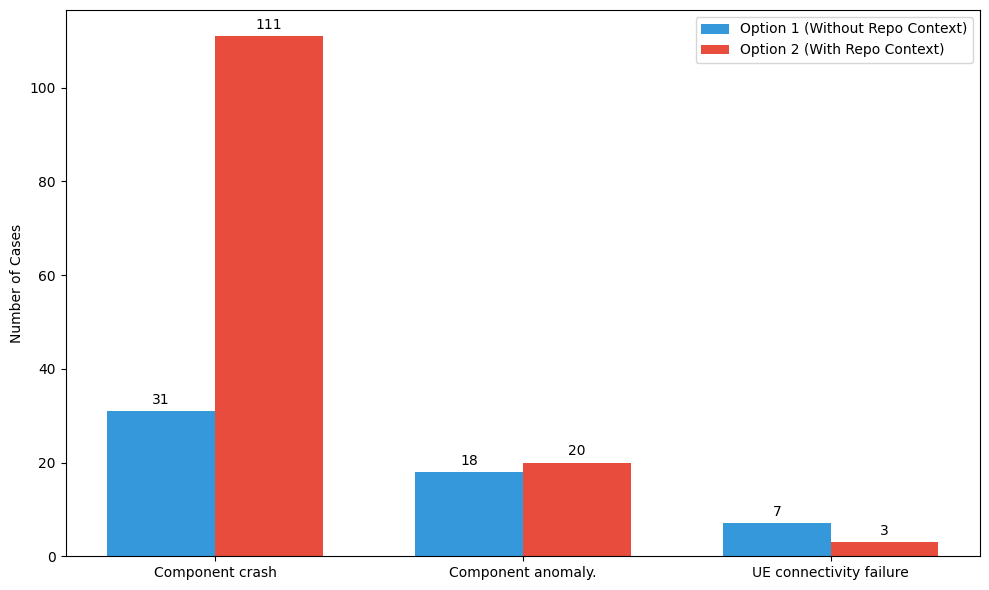

Chart (excluding Sev 0) saved to: C:\Users\bmwlab\Desktop\Testing_Row_Data\experment\result\classification_comparison_severity_no_sev0.png


In [9]:
# 1. 準備繪圖數據：使用 [1:] 語法跳過第一個元素 (Sev 0)
labels = ['Component crash', 'Component anomaly.', 'UE connectivity failure']
dataset1 = [counts1[1], counts1[2], counts1[3]]
dataset2 = [counts2[1], counts2[2], counts2[3]]

x = np.arange(len(labels))  # 標籤位置 (現在只有 3 個)
width = 0.35  # 條形寬度

fig, ax = plt.subplots(figsize=(10, 6))

# 修改標籤名稱以符合圖片中的顯示
rects1 = ax.bar(x - width/2, dataset1, width, label='Option 1 (Without Repo Context)', color='#3498db')
rects2 = ax.bar(x + width/2, dataset2, width, label='Option 2 (With Repo Context)', color='#e74c3c')

# 設定圖表屬性
ax.set_ylabel('Number of Cases')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 自動標註數值函數 (維持不變)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

# 保存與顯示
output_img = output_dir / "classification_comparison_severity_no_sev0.png"
plt.savefig(output_img)
plt.show()

print(f"Chart (excluding Sev 0) saved to: {output_img}")

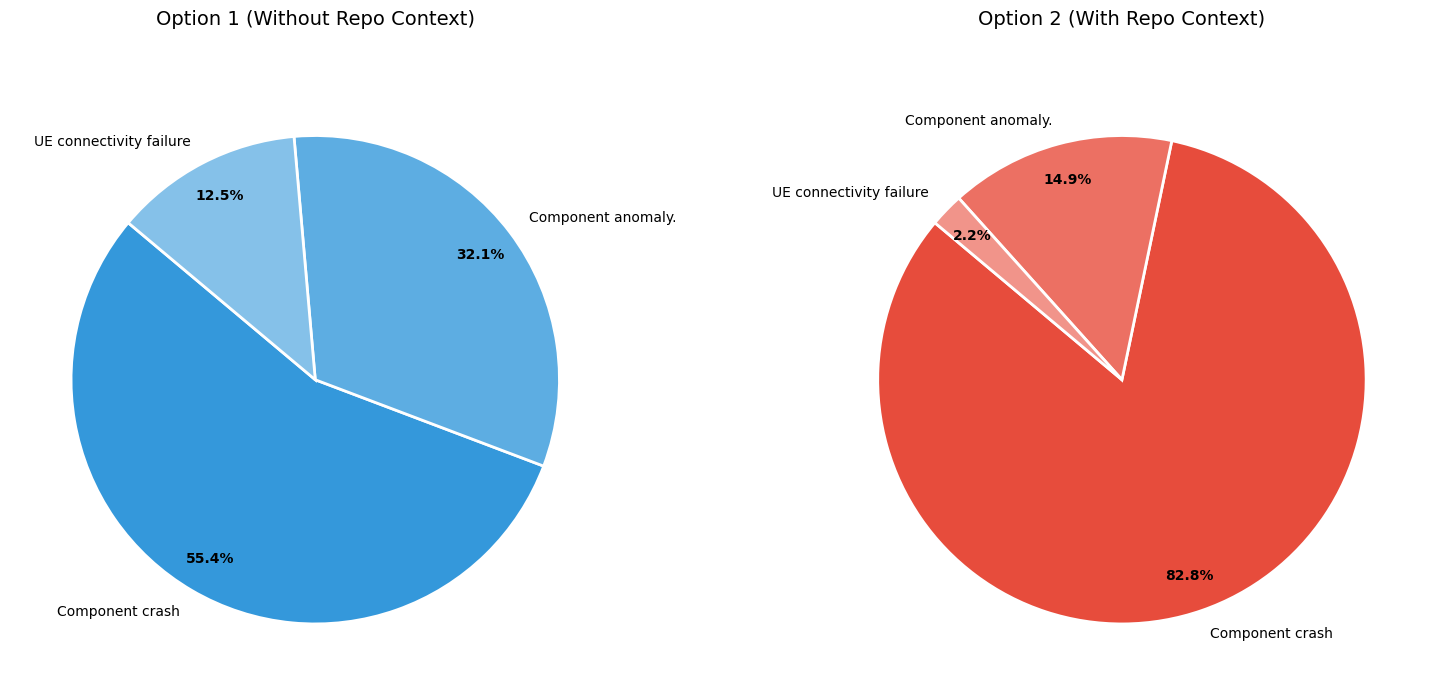

風格一致的圓餅圖已儲存至: C:\Users\bmwlab\Desktop\Testing_Row_Data\experment\result\classification_severity_pie_consistent_style.png


In [10]:
# 1. 準備數據 (根據圖片數據：Sev 1, 2, 3)
labels = ['Component crash', 'Component anomaly.', 'UE connectivity failure']
dataset1 = [31, 18, 7]  # Option 1 數值
dataset2 = [111, 20, 3] # Option 2 數值

# 設定與長條圖一致的顏色
colors1 = ['#3498db', '#5dade2', '#85c1e9'] # Option 1 藍色系
colors2 = ['#e74c3c', '#ec7063', '#f1948a'] # Option 2 紅色系

# 2. 建立畫布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# --- 左圖：Option 1 (藍色調) ---
wedges1, texts1, autotexts1 = ax1.pie(
    dataset1, labels=labels, autopct='%1.1f%%', 
    startangle=140, colors=colors1, pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
ax1.set_title('Option 1 (Without Repo Context)\n', fontsize=14, pad=20)

# --- 右圖：Option 2 (紅色調) ---
wedges2, texts2, autotexts2 = ax2.pie(
    dataset2, labels=labels, autopct='%1.1f%%', 
    startangle=140, colors=colors2, pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
ax2.set_title('Option 2 (With Repo Context)\n', fontsize=14, pad=20)

# 優化文字字體與位置
plt.setp(autotexts1, size=10, weight="bold", color="black")
plt.setp(autotexts2, size=10, weight="bold", color="black")

plt.tight_layout()

# 保存與展示
output_pie = output_dir / "classification_severity_pie_consistent_style.png"
plt.savefig(output_pie, dpi=300)
plt.show()

print(f"風格一致的圓餅圖已儲存至: {output_pie}")